In [1]:
import numpy as np
import NSLib2 as l
import matplotlib.pyplot as plt
import math

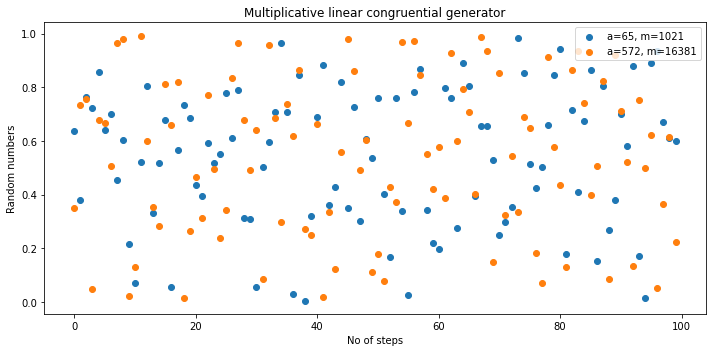

In [2]:
# QUESTION 1

'''
GENERATOR 1:
a=65
m=1021
c=0
x=10

GENERATOR 1:
a=572
m=16381
c=0
x=10
'''



plt.figure(figsize=(10, 5))

l.lcgplot(65, 1021, 0, 10)
l.lcgplot(572, 16381, 0, 10)

plt.xlabel("No of steps")
plt.ylabel("Random numbers")
plt.title("Multiplicative linear congruential generator")
plt.legend()  # Add legend
plt.tight_layout()
plt.show()

The approximate solutions using the generators:
Generator 1: 2.0020364608098733
Generator 2: 1.9998084559755098
Generator 3: 2.0020593952576435



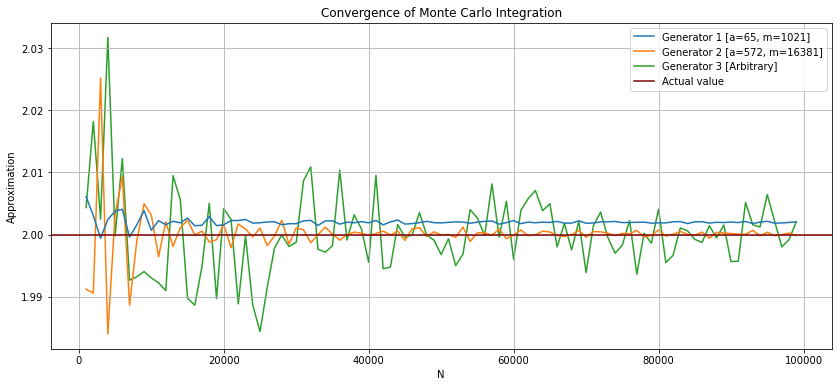

In [3]:
# QUESTION 2

gen1 = l.cong_lcg(a=65, m=1021)
gen2 = l.cong_lcg(a=572, m=16381)
gen3 = l.cong_lcg(a=11**10, m = 2**25, c = 12345, x = 21)

def f(x):
	return np.cos(x)


# Limits
a = -np.pi / 2
b = np.pi / 2

# Calculate and plot the approximated solutions
A1 = []
A2 = []
A3 = []

i_0 = 1000
i_f = 100000
st = 1000

for n in range(i_0, i_f, st):
	A1_val = l.Monte_carlo_int(f, a, b, n, gen1)
	A1.append(A1_val)

	A2_val = l.Monte_carlo_int(f, a, b, n, gen2)
	A2.append(A2_val)
    
for n in range(i_0, i_f, st):
    A3_val = l.Monte_carlo_int(f, a, b, n, gen3)
    A3.append(A3_val)
    


print('The approximate solutions using the generators:')
print('Generator 1:', A1[-1])
print('Generator 2:', A2[-1])
print('Generator 3:', A3[-1])
print()

# Plot the solutions

plt.figure(figsize=(14, 6))

plt.plot(range(i_0, i_f, st), A1, label='Generator 1 [a=65, m=1021]', zorder = 2)
plt.plot(range(i_0, i_f, st), A2, label='Generator 2 [a=572, m=16381]', zorder = 1)
plt.plot(range(i_0, i_f, st), A3, label='Generator 3 [Arbitrary]', zorder = 0)
plt.axhline(y=2, color='maroon', linestyle='-', label='Actual value', zorder = 10)
plt.xlabel('N')
plt.ylabel('Approximation')
plt.title('Convergence of Monte Carlo Integration')
plt.legend()
plt.grid()
plt.show()

##### The actual value of integral of cos(x) from -pi/2 to pi/2 is approximately 2.

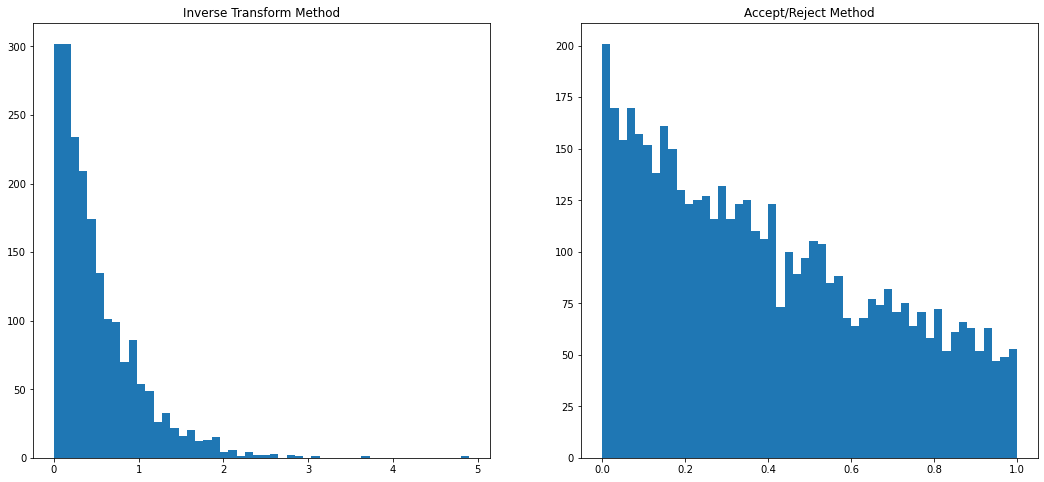

In [4]:
# QUESTION 3

#  Distribution function and its inverse CDF
def p(x):
    return np.exp(-2 * x)

def inv_cdf_p(y):
    return -0.5 * np.log(1 - y)

# Define the sampling distribution and its maximum value
def q(x):
    return 2 - x


# Generate random numbers using the inverse transform method
inv_transform_sam = inv_cdf_p(np.random.uniform(0, 1, 2000))

# Generate random numbers using the accept/reject method
accept_reject_sam = []
while len(accept_reject_sam) < 5000:
    x = np.random.uniform(0, 1)
    u = np.random.uniform(0, 2)
    if u <= p(x) / q(x):
        accept_reject_sam.append(x)

# Plot the histograms
plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)
plt.hist(inv_transform_sam, bins=50, density=False)
plt.title('Inverse Transform Method')

plt.subplot(1, 2, 2)
plt.hist(accept_reject_sam, bins=50, density=False)
plt.title('Accept/Reject Method')

plt.show()

##### The histograms depicts that the accept/reject method is more efficient than the inverse transform method.

In [5]:
#Q4

# Define the function to integrate
def f(x):
    return np.exp(-2 * x) / (1 + x**2)

# Define the importance sampling functions and their inverse CDFs
def p1(x):
    return 0.5

def inv_cdf_p1(y):
    return 2 * y

def p2(x):
    return np.exp(-x)

def inv_cdf_p2(y):
    return -np.log(1 - y)

def p3(x):
    return np.exp(-x / 2) / (2 * (1 - np.exp(-1/2)))

def inv_cdf_p3(y):
    return -2 * np.log(1 - y * (1 - np.exp(-1/2)))

# Calculate the approximations and variances
n = 10000
A_p1, var_p1 = l.mc_imp_sampling(f, p1, inv_cdf_p1, n)
A_p2, var_p2 = l.mc_imp_sampling(f, p2, inv_cdf_p2, n)
A_p3, var_p3 = l.mc_imp_sampling(f, p3, inv_cdf_p3, n)


print(f"Approximated solution with p1: {A_p1}, Variance: {var_p1}\n")
print(f"Approximated solution with p2: {A_p2}, Variance: {var_p2}\n")
print(f"Approximated solution with p3: {A_p3}, Variance: {var_p3}\n")


Approximated solution with p1: 0.3962797683082607, Variance: 0.26652730229062865

Approximated solution with p2: 0.4018689657711714, Variance: 0.10618077942373648

Approximated solution with p3: 0.37369658947643236, Variance: 0.0435552012985682



##### The Numerical value of integral of exp(-2x)/(1+x^2) from 0 to 2 is approximately equal to 0.397675. The variance is significantly reduced for importance sampling with p3 in comparison to p1